In [308]:
import hytools as ht
import matplotlib.pyplot as plt
import numpy as np
import os

In [309]:
os.getcwd()

'/home/jovyan/data-store/cross-sensor-cal'

In [310]:
envi_image= '/home/jovyan/data-store/cross-sensor-cal/output/NEON_D13_NIWO_testaligned_orthomosaic/NEON_D13_NIWO_testaligned_orthomosaic__envi'

#anc_data = {'path_length': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 0],
# 'sensor_az': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 1],
# 'sensor_zn': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 2],
# 'solar_az': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 3],
# 'solar_zn': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 4],
# 'phase': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 5],
# 'slope': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 6],
# 'aspect': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 7],
# 'cosine_i': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 8],
# 'utc_time': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 9]}

envi = ht.HyTools()
envi.read_file(envi_image,'envi')


In [311]:
mask_image= '/home/jovyan/data-store/cross-sensor-cal/output/NEON_D13_NIWO_testaligned_orthomosaic/NEON_D13_NIWO_testaligned_orthomosaic'

#anc_data = {'path_length': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 0],
# 'sensor_az': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 1],
# 'sensor_zn': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 2],
# 'solar_az': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 3],
# 'solar_zn': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 4],
# 'phase': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 5],
# 'slope': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 6],
# 'aspect': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 7],
# 'cosine_i': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 8],
# 'utc_time': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 9]}

og_envi = ht.HyTools()
og_envi.read_file(mask_image,'envi')






In [312]:
line = envi.get_line(100, corrections = [])
band = envi.get_band(1)
wave = envi.get_wave(668)
pixel = envi.get_pixels([25],[25])
#anc = envi.get_anc('sensor_zn',radians =False)

In [313]:
wave

memmap([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [314]:
line = og_envi.get_line(100, corrections = [])
band = og_envi.get_band(1)
wave = og_envi.get_wave(668)
pixel = og_envi.get_pixels([25],[25])

In [315]:
band

memmap([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

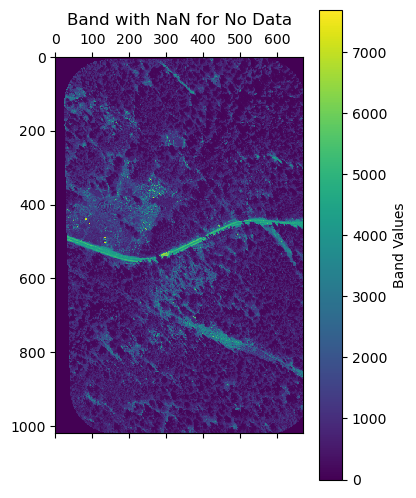

In [316]:
# Assuming 'band' is your input array
band = np.copy(band)  # Make a copy of the band array

# Convert the array to float to allow NaN values
band = band.astype(float)

# Set values where og_envi.mask['no_data'] is True to NaN
band[~og_envi.mask['no_data']] = np.nan

# Plot the band using matshow
plt.matshow(band, cmap='viridis')  # Use a colormap
plt.colorbar(label='Band Values')  # Add a colorbar for the plot
plt.title("Band with NaN for No Data")
plt.show()


In [317]:
topo_coeffs = '/home/jovyan/data-store/cross-sensor-cal/output/NEON_D13_NIWO_testaligned_orthomosaic/NEON_D13_NIWO_testaligned_orthomosaic_topo_coeffs__envi.json'
envi.load_coeffs(topo_coeffs,'topo')

brdf_coeffs = '/home/jovyan/data-store/cross-sensor-cal/output/NEON_D13_NIWO_testaligned_orthomosaic/NEON_D13_NIWO_testaligned_orthomosaic_brdf_coeffs__envi.json'
envi.load_coeffs(brdf_coeffs,'brdf')

In [318]:
print(envi.brdf)
#print(envi.topo)

{'solar_zn_type': 'scene', 'type': 'flex', 'grouped': True, 'sample_perc': 0.1, 'geometric': 'li_dense_r', 'volume': 'ross_thick', 'b/r': 10, 'h/b': 2, 'interp_kind': 'linear', 'calc_mask': [['ndi', {'band_1': 862, 'band_2': 668, 'min': 0.1, 'max': 1.0}]], 'apply_mask': [['ndi', {'band_1': 862, 'band_2': 668, 'min': 0.1, 'max': 1.0}]], 'diagnostic_plots': True, 'diagnostic_waves': [475, 862, 705, 668], 'bin_type': 'dynamic', 'num_bins': 32, 'ndvi_bin_min': 0.05, 'ndvi_bin_max': 1.0, 'ndvi_perc_min': 10, 'ndvi_perc_max': 95, 'solar_zn_norm_radians': 1.5626996755599976, 'bins': {'1': [0.05, 0.2801045242820045], '2': [0.2801045242820045, 0.3732719560863269], '3': [0.3732719560863269, 0.40466091709886864], '4': [0.40466091709886864, 0.43580295613365283], '5': [0.43580295613365283, 0.46606674165729284], '6': [0.46606674165729284, 0.49575492687493933], '7': [0.49575492687493933, 0.5240512183983419], '8': [0.5240512183983419, 0.5507240541755011], '9': [0.5507240541755011, 0.5752278222056909],

In [319]:
def show_rgb(hy_obj,r=650,g=560,b=475, correct= []):

    rgb=  np.stack([hy_obj.get_wave(r,corrections= correct),
                    hy_obj.get_wave(g,corrections= correct),
                    hy_obj.get_wave(b,corrections= correct)])
    rgb = np.moveaxis(rgb,0,-1).astype(float)
    rgb[rgb ==hy_obj.no_data] = np.nan

    bottom = np.nanpercentile(rgb,5,axis = (0,1))
    top = np.nanpercentile(rgb,95,axis = (0,1))
    rgb = np.clip(rgb,bottom,top)

    rgb = (rgb-np.nanmin(rgb,axis=(0,1)))/(np.nanmax(rgb,axis= (0,1))-np.nanmin(rgb,axis= (0,1)))

    height = int(hy_obj.lines/hy_obj.columns)

    fig  = plt.figure(figsize = (7,7) )
    plt.imshow(rgb)
    plt.show()
    plt.close()
    


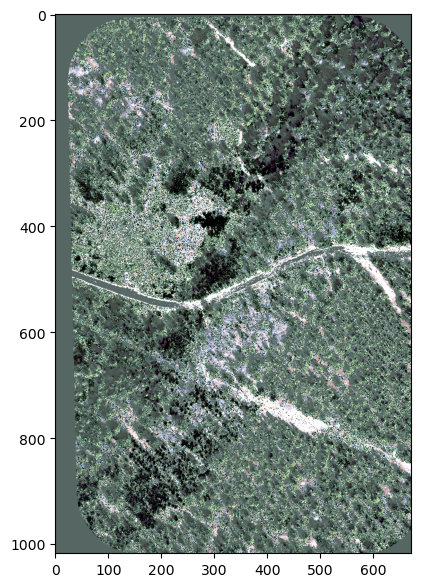

In [320]:
show_rgb(envi, correct= [])

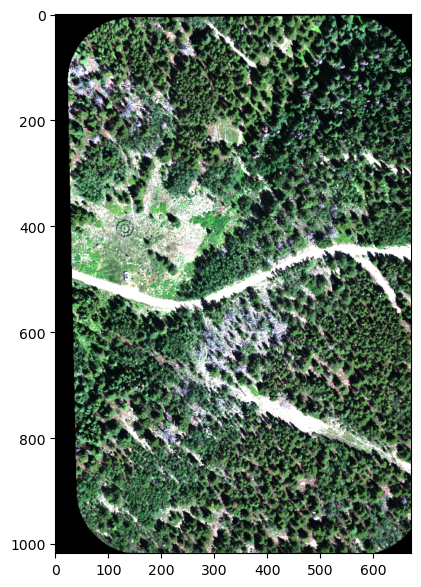

In [321]:
show_rgb(og_envi)

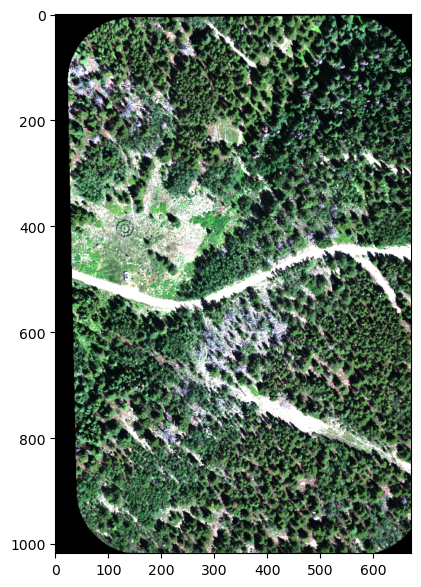

In [322]:
show_rgb(og_envi, correct = ['brdf'])

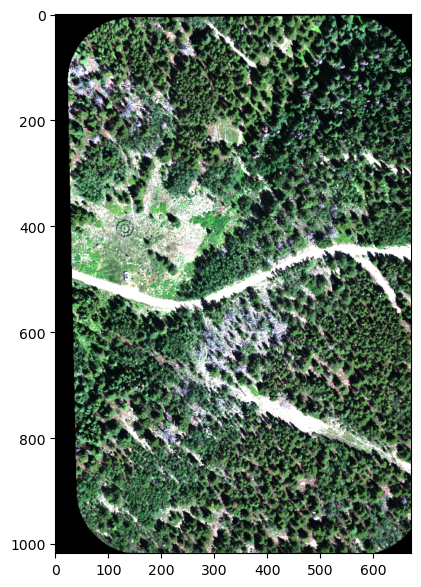

In [323]:
show_rgb(og_envi, correct = ['topo','brdf'])

In [324]:
og_envi.get_wave(862, corrections= ['topo', 'brdf'])

memmap([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

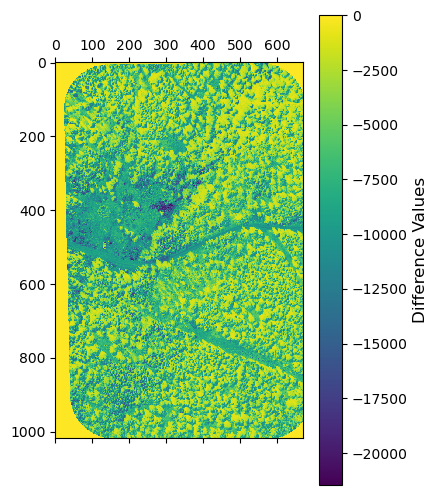

In [326]:
difference = (envi.get_wave(862)) - og_envi.get_wave(862)
plt.matshow(difference, cmap='viridis')  # 'viridis' is the default colormap in Matplotlib

# Add a colorbar to act as a legend for the values
cbar = plt.colorbar()
cbar.set_label('Difference Values', fontsize=12)  # Label for the colorbar

# Show the plot
plt.show()

In [327]:
outwaves = [x for x in range(450,2500,5)]
envi.resampler = {'type': 'cubic','out_waves' :outwaves}

In [328]:
original = envi.get_pixels([200],[100])
original
#resample = envi.get_pixels([10],[10], resample = True)

# plt.plot(envi.wavelengths,original[0])
# plt.plot(outwaves,resample[0])
# plt.ylim(0,.6)

array([[-7.6316905],
       [-6.8649716],
       [-5.9089313],
       [-5.3490825],
       [-3.7316687],
       [-1.5362754],
       [-1.9449497],
       [-1.0190723],
       [-1.4832788],
       [-5.317988 ]], dtype=float32)

In [329]:
envi.wavelengths

array([444., 475., 531., 560., 650., 668., 705., 717., 740., 862.])

In [330]:
reflectance = original.flatten()
reflectance

array([-7.6316905, -6.8649716, -5.9089313, -5.3490825, -3.7316687,
       -1.5362754, -1.9449497, -1.0190723, -1.4832788, -5.317988 ],
      dtype=float32)

In [331]:
og_envi2 = og_envi.get_pixels([200],[100])
og_envi2

array([[ 577],
       [ 642],
       [ 764],
       [ 862],
       [1169],
       [1222],
       [1630],
       [1756],
       [2120],
       [3221]], dtype=int16)

In [332]:
old_ref = og_envi2.flatten()
old_ref

array([ 577,  642,  764,  862, 1169, 1222, 1630, 1756, 2120, 3221],
      dtype=int16)

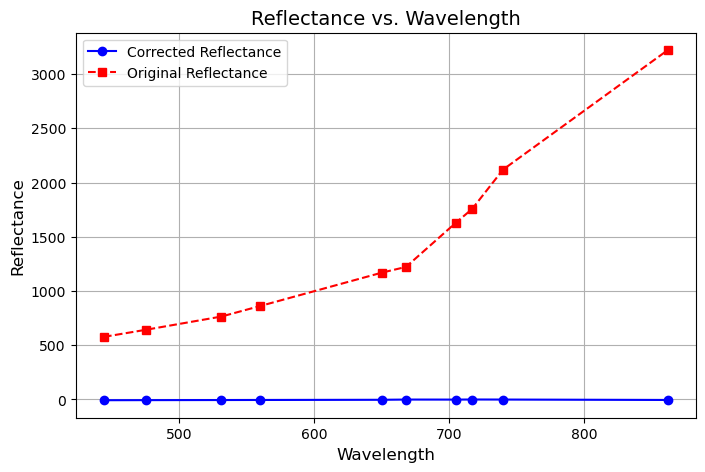

In [333]:
# Plot the data
plt.figure(figsize=(8, 5))  # Set the figure size
plt.plot(envi.wavelengths, reflectance, marker='o', linestyle='-', color='b', label='Corrected Reflectance')
plt.plot(envi.wavelengths, old_ref, marker='s', linestyle='--', color='r', label='Original Reflectance')


# Add labels, title, and legend
plt.xlabel("Wavelength", fontsize=12)
plt.ylabel("Reflectance", fontsize=12)
plt.title("Reflectance vs. Wavelength", fontsize=14)
plt.legend()
plt.grid(True)  # Add a grid
plt.show()

In [334]:
original = envi.get_pixels([200],[200])
original
#resample = envi.get_pixels([10],[10], resample = True)

# plt.plot(envi.wavelengths,original[0])
# plt.plot(outwaves,resample[0])
# plt.ylim(0,.6)

array([[  -61.054413],
       [  -79.36207 ],
       [  -94.26845 ],
       [ -116.750206],
       [ -108.10045 ],
       [  -86.22676 ],
       [ -202.84073 ],
       [ -298.52097 ],
       [ -682.2389  ],
       [-1024.1377  ]], dtype=float32)

In [335]:
reflectance = original.flatten()
reflectance

array([  -61.054413,   -79.36207 ,   -94.26845 ,  -116.750206,
        -108.10045 ,   -86.22676 ,  -202.84073 ,  -298.52097 ,
        -682.2389  , -1024.1377  ], dtype=float32)

In [336]:
og_envi2 = og_envi.get_pixels([200],[200])
og_envi2

array([[ 705],
       [ 794],
       [1305],
       [1371],
       [ 935],
       [ 813],
       [2202],
       [3592],
       [7552],
       [9960]], dtype=int16)

In [337]:
old_ref = og_envi2.flatten()
old_ref

array([ 705,  794, 1305, 1371,  935,  813, 2202, 3592, 7552, 9960],
      dtype=int16)

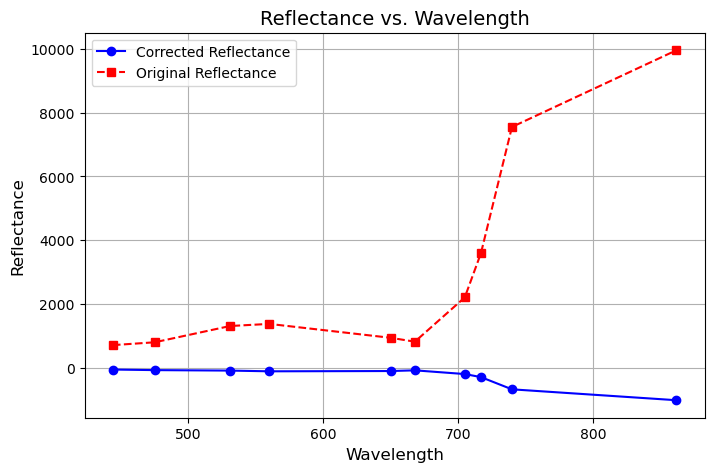

In [338]:
# Plot the data
plt.figure(figsize=(8, 5))  # Set the figure size
plt.plot(envi.wavelengths, reflectance, marker='o', linestyle='-', color='b', label='Corrected Reflectance')
plt.plot(envi.wavelengths, old_ref, marker='s', linestyle='--', color='r', label='Original Reflectance')


# Add labels, title, and legend
plt.xlabel("Wavelength", fontsize=12)
plt.ylabel("Reflectance", fontsize=12)
plt.title("Reflectance vs. Wavelength", fontsize=14)
plt.legend()
plt.grid(True)  # Add a grid
plt.show()